In [3]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import contextily as cx

In [ ]:
#get json from github
df = pd.read_json(
    "https://raw.githubusercontent.com/colarussoa/urban_flood_prediction/refs/heads/main/Data/weather.json",
    lines=True
)
#isolate location field
df_location = df[['location']]
#isolate rainfall and date
df1 = pd.json_normalize(df["data"])
df2 = df1[['dateutc','hourlyrainin']]
#merge dfs together
df_rainfall = pd.concat([df_location, df2], axis=1)
#convert date string to proper date field
df_rainfall["dateutc"] = pd.to_datetime(df_rainfall["dateutc"], unit="ms")

In [ ]:
df_rainfall

In [4]:
location_dict = {
    "SLCC" : [27.827984, -82.763640],
    "Bartlett Park" : [27.7505490, -82.6411180],
    "Denver Park" : [27.8231228, -82.6113442]
}

In [5]:

df

,name,lat,long
0,SLCC,27.827984,-82.763640
1,Bartlett Park,27.750549,-82.641118
2,Denver Park,27.823123,-82.611344


In [15]:
df = pd.read_csv("./AWN_coords.txt", sep=", ", engine='python') #read in points
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])] #get geometry in porper format
gdf = GeoDataFrame(df, geometry=geometry) #Convert to gdf
gdf = gdf.set_crs('epsg:4326') #set crs to WGS84
gdf = gdf.to_crs(epsg=3857) #convert to web mercator

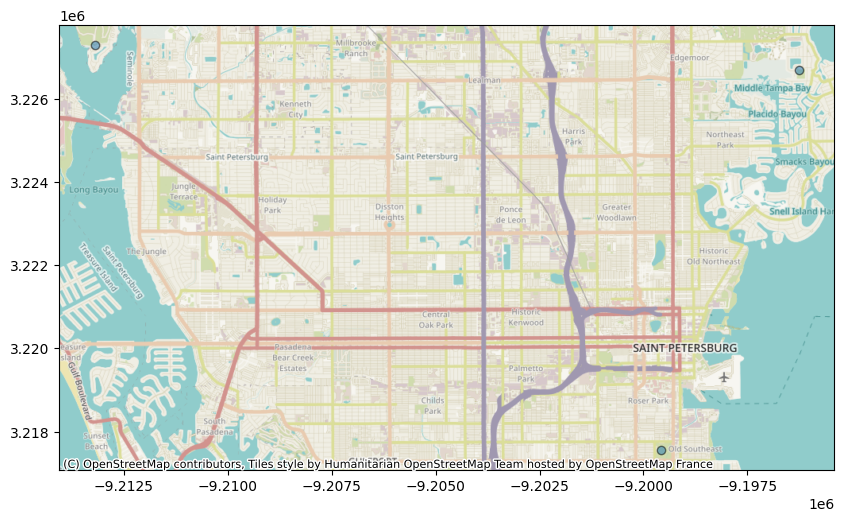

In [16]:
#plot
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)

In [17]:
gdf

,name,lat,long,geometry
0,SLCC,27.827984,-82.763640,POINT (-9213206.261 3227303.767)
1,Bartlett Park,27.750549,-82.641118,POINT (-9199567.174 3217559.973)
2,Denver Park,27.823123,-82.611344,POINT (-9196252.77 3226691.868)
